In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data = pd.read_csv('./Financial Well-Being Survey Data/NFWBS_PUF_2016_data.csv')

print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} features.')

The dataset contains 6394 rows and 217 features.


In [135]:
data.set_index('PUF_ID', inplace=True)

# Data exploration

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 10350 to 8516
Columns: 216 entries, sample to finalwt
dtypes: float64(2), int64(214)
memory usage: 10.6 MB


In [137]:
data.head()

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,...,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [138]:
max(data.isna().sum()) # no explicit missing values

0

In [139]:
data.columns.values

array(['sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore', 'FWB1_1',
       'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6', 'FWB2_1',
       'FWB2_2', 'FWB2_3', 'FWB2_4', 'FSscore', 'FS1_1', 'FS1_2', 'FS1_3',
       'FS1_4', 'FS1_5', 'FS1_6', 'FS1_7', 'FS2_1', 'FS2_2', 'FS2_3',
       'SUBKNOWL1', 'ACT1_1', 'ACT1_2', 'FINGOALS', 'PROPPLAN_1',
       'PROPPLAN_2', 'PROPPLAN_3', 'PROPPLAN_4', 'MANAGE1_1', 'MANAGE1_2',
       'MANAGE1_3', 'MANAGE1_4', 'SAVEHABIT', 'FRUGALITY', 'AUTOMATED_1',
       'AUTOMATED_2', 'ASK1_1', 'ASK1_2', 'SUBNUMERACY2', 'SUBNUMERACY1',
       'CHANGEABLE', 'GOALCONF', 'LMscore', 'FINKNOWL1', 'FINKNOWL2',
       'FINKNOWL3', 'FK1correct', 'FK2correct', 'FK3correct', 'KHscore',
       'KHKNOWL1', 'KHKNOWL2', 'KHKNOWL3', 'KHKNOWL4', 'KHKNOWL5',
       'KHKNOWL6', 'KHKNOWL7', 'KHKNOWL8', 'KHKNOWL9', 'KH1correct',
       'KH2correct', 'KH3correct', 'KH4correct', 'KH5correct',
       'KH6correct', 'KH7correct', 'KH8correct', 'KH9correct', 'ENDSMEET',
       'H

In [140]:
data.duplicated().sum()

0

## Dropping irrelevant features

In [141]:
FWB_cols = list(filter(lambda x: 'FWB' in x, data.columns.values))
data.drop(FWB_cols[1:], axis = 1, inplace = True)

FS_cols = list(filter(lambda x: 'FS' in x, data.columns.values))
data.drop(FS_cols[1:], axis = 1, inplace = True)

LM_cols = list(filter(lambda x: 'FINKNOWL' in x, data.columns.values))
data.drop(LM_cols, axis = 1, inplace = True)

FKcorrect_cols = ['FK1correct', 'FK2correct', 'FK3correct']
data.drop(FKcorrect_cols, axis = 1, inplace = True)

KH_cols = list(filter(lambda x: 'KHKNOWL' in x, data.columns.values))
data.drop(KH_cols, axis = 1, inplace = True)

KHcorrect_cols = ['KH1correct', 'KH2correct', 'KH3correct', 'KH4correct', 'KH5correct', 'KH6correct', 'KH7correct', 'KH8correct', 'KH9correct']
data.drop(KHcorrect_cols, axis = 1, inplace = True)

OBJNUMcols = list(filter(lambda x: 'OBJNUMERACY' in x, data.columns.values))
data.drop(OBJNUMcols, axis = 1, inplace = True)

data.drop('EMPLOY', axis = 1, inplace = True) # drop employ because it is already one hot enconded
data.drop('EMPLOY1_9', axis = 1, inplace = True) # drop because of perfect collinearity problem
data.drop('Military_Status', axis = 1, inplace = True) # redundant with MILITARY

data.drop(list(filter(lambda x: 'KIDS' in x, data.columns.values)), axis =1, inplace = True)

In [142]:
data.shape

(6394, 163)

## Missing data

- -5: County not known (Applies to PCTLT200FPL. County was not known for these respondents and details on the county-level degree of poverty could not be merged in for these cases.) ACTION: 395 rows

- -4: Response not written to the database due to error (SWB and FWB variables) ACTION: only one record -> drop (?)

- -3: Invalid response/ Incoherent data (SOCSEC2, SOCSEC3, KIDS) ACTION: 234 rows for SOCSEC + 1 row for KIDS_2 drop(?)

- -2: Question not asked because respondant not in item base (VALUERANGES, MORTGAGE, PAIDHELP, SOCSEC1, SOCSEC2, SOCSEC3, LIFEEXPECT and RETIRE). The respondent was correctly skipped over this item based on responses to previous questions or panel data on respondant age ACTION: ? pesquisar

- 8: I can’t recall (HSLOC) ACTION: 21 rows -> impute with mode (?)

- -1: Not answered/ Left blank (Applies to most items) ACTION: 2302 rows with missing data (impute; see how to impute each case specifically)


- 98: Don't know (HOUSERANGES, VALUERANGES, MORTGAGE, SAVINGSRANGES) ACTION: 514 rows -> impute

- 99: Prefer not to say (HOUSERANGES, VALUERANGES, MORTGAGE, SAVINGSRANGES,  EMPLOY: Analysis variable of EMPLOY1-9 -> if EMPLOY did not select any, it is a missing value) ACTION: 1466 rows -> impute

### __-5: County not known__

PCTLT200FPL: percentage of people who live in the same county as the survey respondent who have an income that is below 200% of the federal poverty level

-5 when unkown county of the responded

395 rows

How to solve this?
- impute: The narrowest information we have about respondant's residence is the census division. If we imputed with the census division percentage of people with income below 200% of FPL, all imputed values would be 0. Instead, it would be better to use a KNNimputer: variables that possibly relate people that live in the same county: Census division (PPREG9), Household income (PPINCIMP), Education (PPEDUC), Age (agecat), Financial Hardship (MATHARDSHIP_1 - MATHARDSHIP_6)

In [143]:
data = data.replace(-5, np.nan)

In [144]:
nrows = data[data['PCTLT200FPL'].isna()].shape[0]
print(f'nr of rows with missing value: {nrows}')

nr of rows with missing value: 395


In [145]:
data['PCTLT200FPL'].value_counts()

0.0    4548
1.0    1451
Name: PCTLT200FPL, dtype: int64

Let's see which features are more informative/correlated with PCTLT200FPL to use to compute KNN

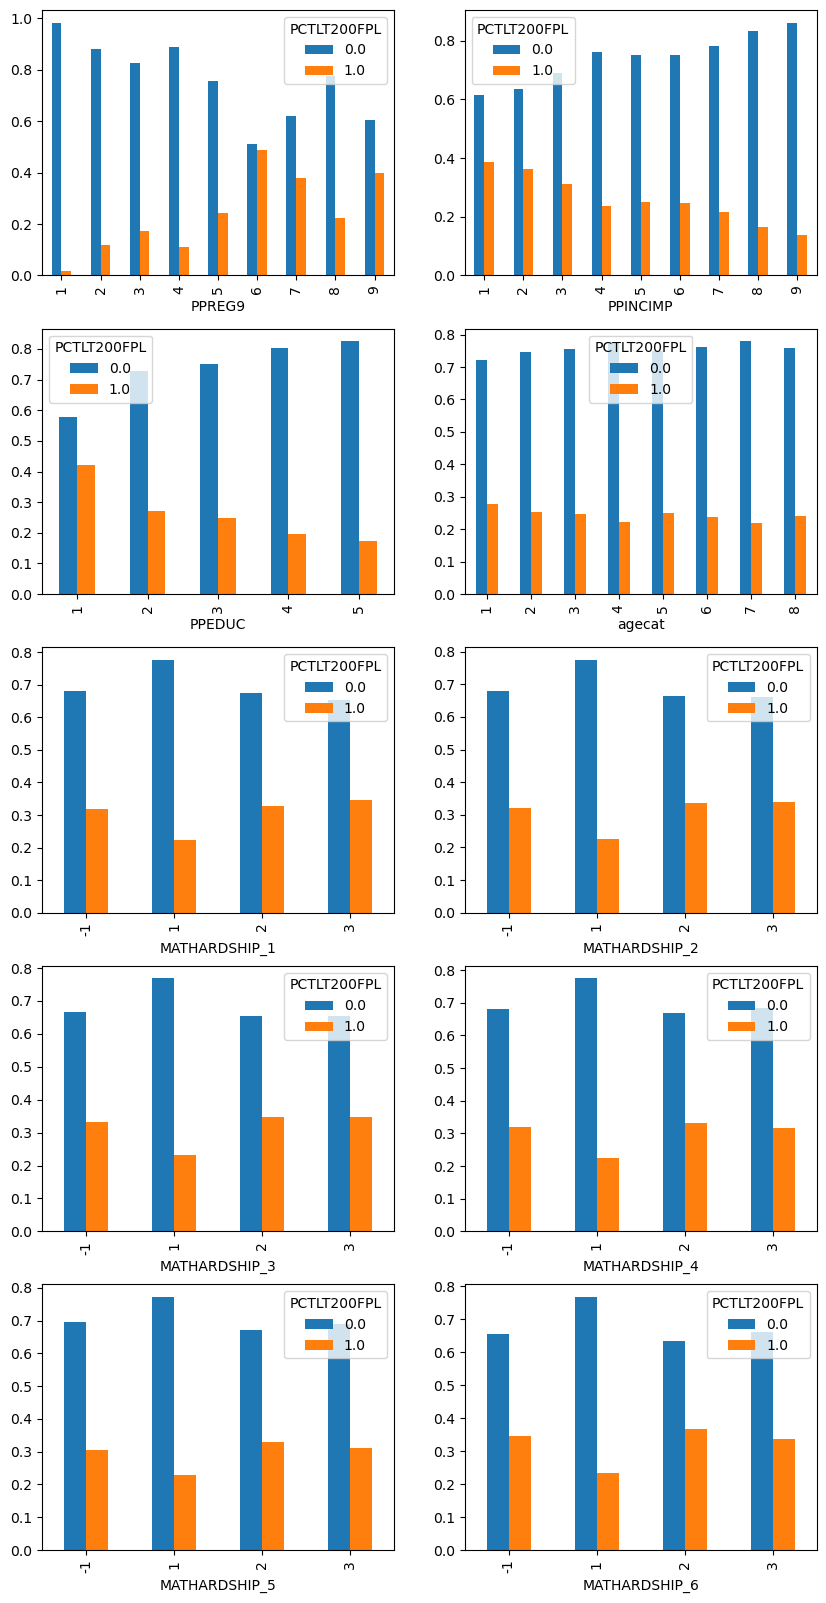

In [146]:
feats = ['PPREG9', 'PPINCIMP', 'PPEDUC', 'agecat', 'MATHARDSHIP_1', 'MATHARDSHIP_2', 'MATHARDSHIP_3', 'MATHARDSHIP_4', 'MATHARDSHIP_5', 'MATHARDSHIP_6']

fig, axs = plt.subplots(5, 2, figsize=(10, 20))
for i in range(1, 11):
    data.groupby(feats[i-1])['PCTLT200FPL'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 2, (i-1) % 2])

Conclusion: KNN using PPREG9, PPINCIMP and PPEDUC

In [147]:
data = data.replace(np.nan, -5)

### __-4: Response not written to the database due to error__

SWB and FWB

How to solve this?
- drop: only one row affected

In [148]:
data[(data == -4).any(axis = 1)]

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,SUBKNOWL1,ACT1_1,ACT1_2,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
12173,1,3,-4,-4,-4,-4,48,7,4,3,...,1,3,5,0,0,0,0,1,0.0,1.253964


In [149]:
data.drop(12173, inplace = True)

### __-3: Invalid response/ Incoherent data__

SOCSEC2, SOCSEC3, KIDS_2

SOCSEC2: 'At what age did you begin receiving benefits'. Only applies if age > 62 and started receiving socsec benefits. Invalid when answered < 62 years

SOCSEC3: 'Age likely to start receiving Social Security retirement benefits'. Only applies if age < 62 OR not has started receiveing socssec benefits. Invalid when respondant age is two or more year greater than given response

234 rows with invalid data
- 166 from SOCSEC2
- 68 from SOCSEC3

What to do?
- impute SOCSEC2 with mode
- impute SOCSEC3 with mode

In [150]:
data[data['SOCSEC2'] == -3].shape[0]

166

In [151]:
data[data['SOCSEC3'] == -3].shape[0]

68

### Others

__-1: Not answered/ Left blank__

2301 rows

__98: Don't know__

514 rows

__99: Prefer not to say__


1384 rows in total

- 624 from HOUSERANGES
- 159 from VALUERANGES
- 498 from MORTGAGE
- 988 from SAVINGSRANGES
- 116 from EMPLOY

In [152]:
data[(data == -1).any(axis = 1)].shape[0]

1927

In [153]:
data[(data[['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES']] == 98).any(axis = 1)].shape[0]

514

In [154]:
data[(data[['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES']] == 99).any(axis = 1)].shape[0]

1384

In [155]:
data = data.replace(-1, np.nan)

# replace 98 and 99 only on the columns with code
data[['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES']] = data[['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES']].replace(98, np.nan)
data[['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES']] = data[['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES']].replace(99, np.nan)

Let's see the number of missing values per row to try to exclude rows with too many missing values

In [156]:
data[data.isna().sum(axis = 1) >= 5]

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,SUBKNOWL1,ACT1_1,ACT1_2,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
7267,1,3,6.0,6.0,6.0,49.0,42.0,NaN,NaN,NaN,...,1,3,7,0,0,0,0,1,0.0,1.410871
9182,1,3,6.0,NaN,NaN,50.0,43.0,4.0,4.0,3.0,...,1,4,9,0,0,0,0,2,0.0,0.647301
11082,1,3,6.0,6.0,5.0,62.0,55.0,4.0,5.0,4.0,...,1,3,5,0,0,0,0,3,0.0,0.455829
8309,2,3,3.0,4.0,2.0,49.0,37.0,NaN,4.0,3.0,...,1,3,5,0,0,0,0,1,0.0,0.597089
9916,1,3,7.0,6.0,6.0,62.0,46.0,4.0,5.0,3.0,...,1,3,5,0,0,0,1,2,0.0,0.637269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13222,3,2,7.0,7.0,7.0,40.0,45.0,4.0,3.0,2.0,...,1,3,7,0,0,0,0,4,-5.0,1.232251
11078,3,1,3.0,4.0,5.0,26.0,44.0,4.0,3.0,3.0,...,1,2,3,0,1,0,0,1,-5.0,1.379959
12353,1,3,5.0,7.0,3.0,62.0,26.0,4.0,3.0,3.0,...,1,3,5,0,0,0,0,2,0.0,1.745759


Now let's drop the rows with more than 5 missing values. Only 336 rows will be excluded.

In [157]:
data.drop(data[data.isna().sum(axis = 1) >= 5].index, axis = 0, inplace = True)

In [158]:
data.shape

(6096, 163)

Now, let's see which columns have missing values

In [159]:
data.isna().sum(axis = 0).index

Index(['sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore', 'FSscore',
       'SUBKNOWL1', 'ACT1_1', 'ACT1_2',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=163)

In [160]:
# how many missing values per column that has missing values
data.isna().sum(axis = 0)[data.isna().sum(axis = 0) > 0]

SWB_1         15
SWB_2         38
SWB_3         40
SUBKNOWL1     35
ACT1_1        14
              ..
SOCSEC3       64
LIFEEXPECT    46
HHEDUC        18
RETIRE         2
MILITARY      17
Length: 72, dtype: int64

Get all columns with less than 100 missing values

In [161]:
cols = data.isna().sum(axis = 0)[(data.isna().sum(axis = 0) > 0) & (data.isna().sum(axis = 0) < 100)].index.values

cols

array(['SWB_1', 'SWB_2', 'SWB_3', 'SUBKNOWL1', 'ACT1_1', 'ACT1_2',
       'FINGOALS', 'SAVEHABIT', 'FRUGALITY', 'AUTOMATED_1', 'AUTOMATED_2',
       'ASK1_1', 'ASK1_2', 'SUBNUMERACY2', 'SUBNUMERACY1', 'CHANGEABLE',
       'GOALCONF', 'ENDSMEET', 'HOUSING', 'LIVINGARRANGEMENT',
       'CONSPROTECT1', 'CONSPROTECT2', 'CONSPROTECT3', 'EARNERS',
       'VOLATILITY', 'SNAP', 'MATHARDSHIP_6', 'COLLECT', 'REJECTED_1',
       'REJECTED_2', 'ABSORBSHOCK', 'BENEFITS_3', 'BENEFITS_4',
       'BENEFITS_5', 'FRAUD2', 'COVERCOSTS', 'MANAGE2', 'PAIDHELP',
       'PAREDUC', 'FINSOC2_3', 'FINSOC2_5', 'FINSOC2_6', 'MATERIALISM_1',
       'MATERIALISM_2', 'MATERIALISM_3', 'HEALTH', 'SCFHORIZON',
       'DISCOUNT', 'MEMLOSS', 'DISTRESS', 'SELFCONTROL_1',
       'SELFCONTROL_2', 'SELFCONTROL_3', 'OUTLOOK_1', 'OUTLOOK_2', 'PEM',
       'HOUSESAT', 'SOCSEC1', 'SOCSEC2', 'SOCSEC3', 'LIFEEXPECT',
       'HHEDUC', 'RETIRE', 'MILITARY'], dtype=object)

In [162]:
data.isna().sum(axis = 0)[data.isna().sum(axis = 0) > 100].index.values

array(['HOUSERANGES', 'VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES',
       'BORROW_1', 'BORROW_2', 'HSLOC', 'CONNECT'], dtype=object)

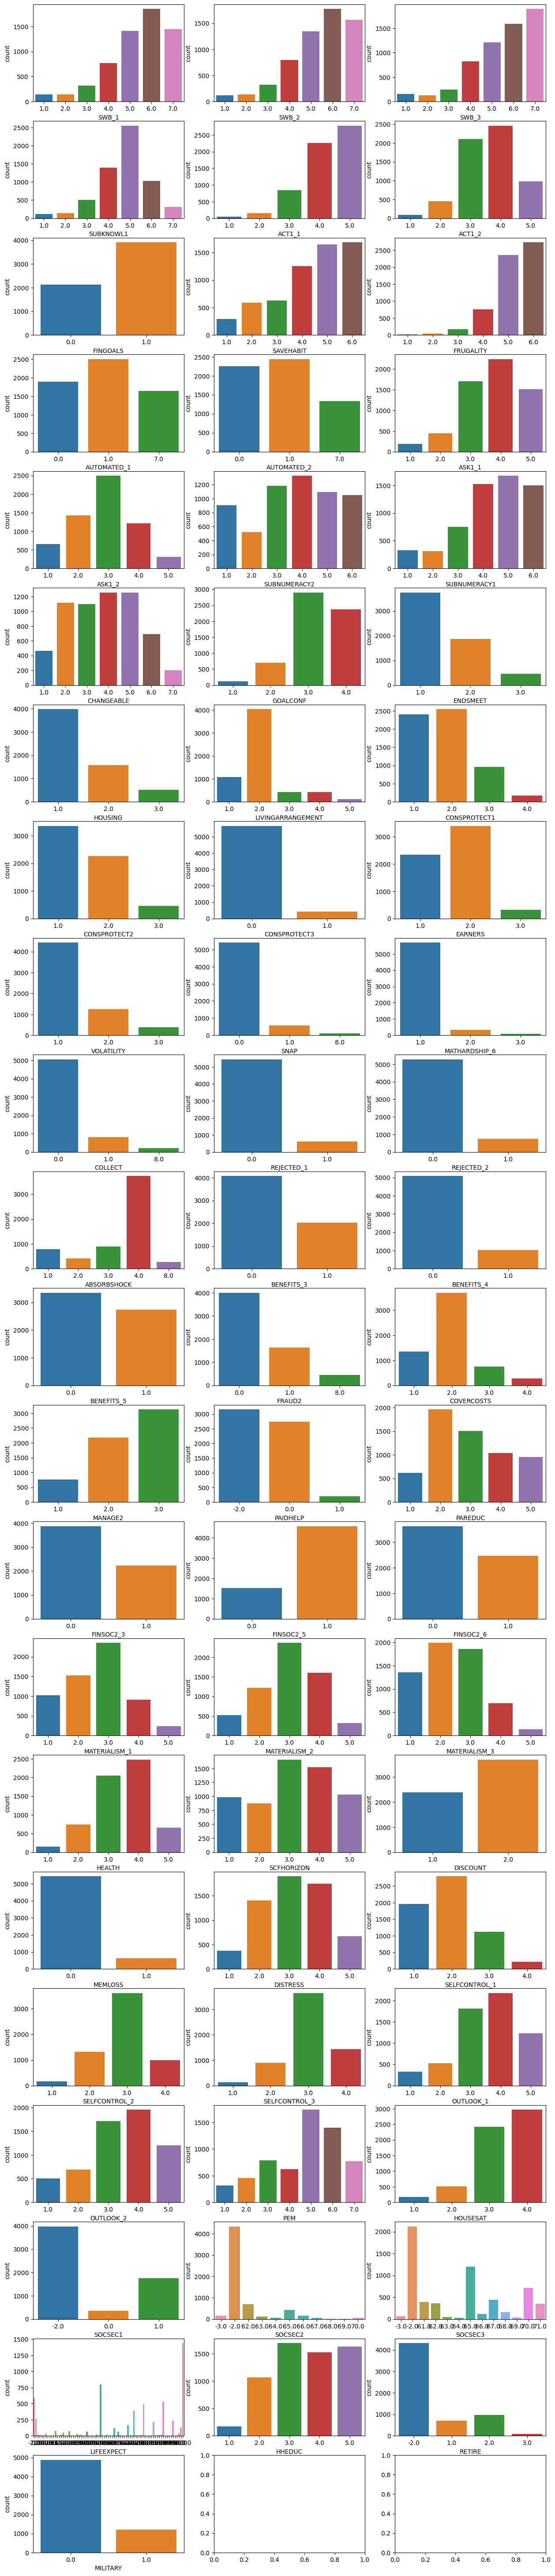

In [165]:
fig, axs = plt.subplots(22, 3, figsize=(15, 75))

for i in range(1, 65):
    sns.countplot(x = cols[i - 1], data = data, ax = axs[(i - 1 )// 3, (i-1) % 3])

__Ordinal__

SWB_1, SWB_2, SUBKNOWL1, ACT1_2, ASK1_1, SUBNUMERACY1, CONSPROTECT1, ABSORBSHOCK, PAREDUC, MATERIALISM_3, HEALTH, SELFCONTROL_1, SELFCONTROL_2, SELFCONTROL_3, OUTLOOK_1, OUTLOOK_2, PEM, LIFEEXPECT: skewed -> median

SWB_3, ACT1_1, SAVEHABIT, FRUGALITY, ENDSMEET, CONSPROTECT2, MATHARDSHIP_6, HOUSESAT: staricase -> mode

ASK1_2, SUBNUMERACY2, CHANGEABLE, GOALCONF, EARNERS, VOLATILITY, MATERIALISM,_1, MATERIALISM_2, SCFHORIZON, DISTRESS, HHEDUC, RETIRE (cuidado com -2): gaussian distribution -> mode

__Categorical__

FINGOALS, AUTOMATED_1, AUTOMATED_2, HOUSING, LIVINGARRANGEMENT, CONSPROTECT3, SNAP, COLLECT, REJECTED_1, REJECTED_2, BENEFITS_3, BENEFITS_4, BENEFITS_5, FRAUD2, COVERCOSTS, MANAGE2, PAIDHELP (cuidado com -2), FINSOC2_3, FINSOC2_5, FINSOC2_6, DISCOUNT, MEMLOSS, SOCSEC1, SOCSEC2, SOCSEC3 (cuidado com -2), MILITARY: mode

Mode imputation: This involves replacing the missing values with the most frequent value in the ordinal feature. This method is most appropriate when the feature is nominal or when it is ordinal and has a few missing values

Median imputation: This involves replacing the missing values with the median value of the ordinal feature. This method is most appropriate when the ordinal feature has a skewed distribution.

In [177]:
data.loc[data['HOUSING'].isna(), ['HOUSING', 'VALUERANGES', 'MORTGAGE']] # 12 observations with no information about housing

# better to drop because VALUERANGES and MORTGAGE depend on this one and it is impossible to infer
data.drop(data[data['SOCSEC1'].isna()].index, axis = 0, inplace = True)

__HOUSERANGES__

'About how much do you pay for your home each month?'

Possibly related variables: FWBScore, PROPPLAN_3, MANAGE1_3, SAVEHABIT, GOALCONF, ENDSMEET, HOUSING, LIVINGARRANGEMENTS, PRODHAVE_1, ERANERS, VOLATILITY, MATHARDSHIP_3, COLLECT, ABSORBSHOCK

<Axes: xlabel='HOUSERANGES', ylabel='count'>

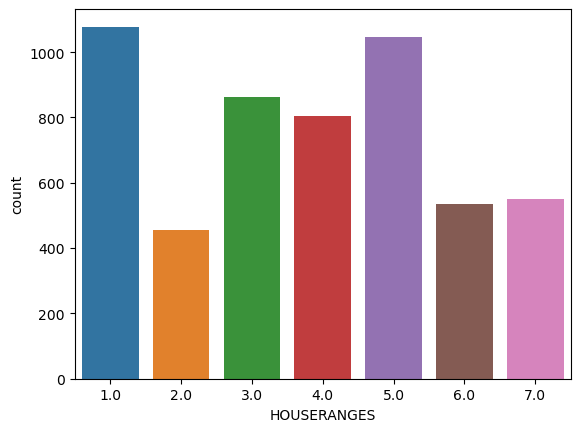

In [166]:
sns.countplot(x = 'HOUSERANGES', data = data)

In [167]:
data['HOUSERANGES'].value_counts()

1.0    1078
5.0    1045
3.0     864
4.0     805
7.0     551
6.0     534
2.0     454
Name: HOUSERANGES, dtype: int64

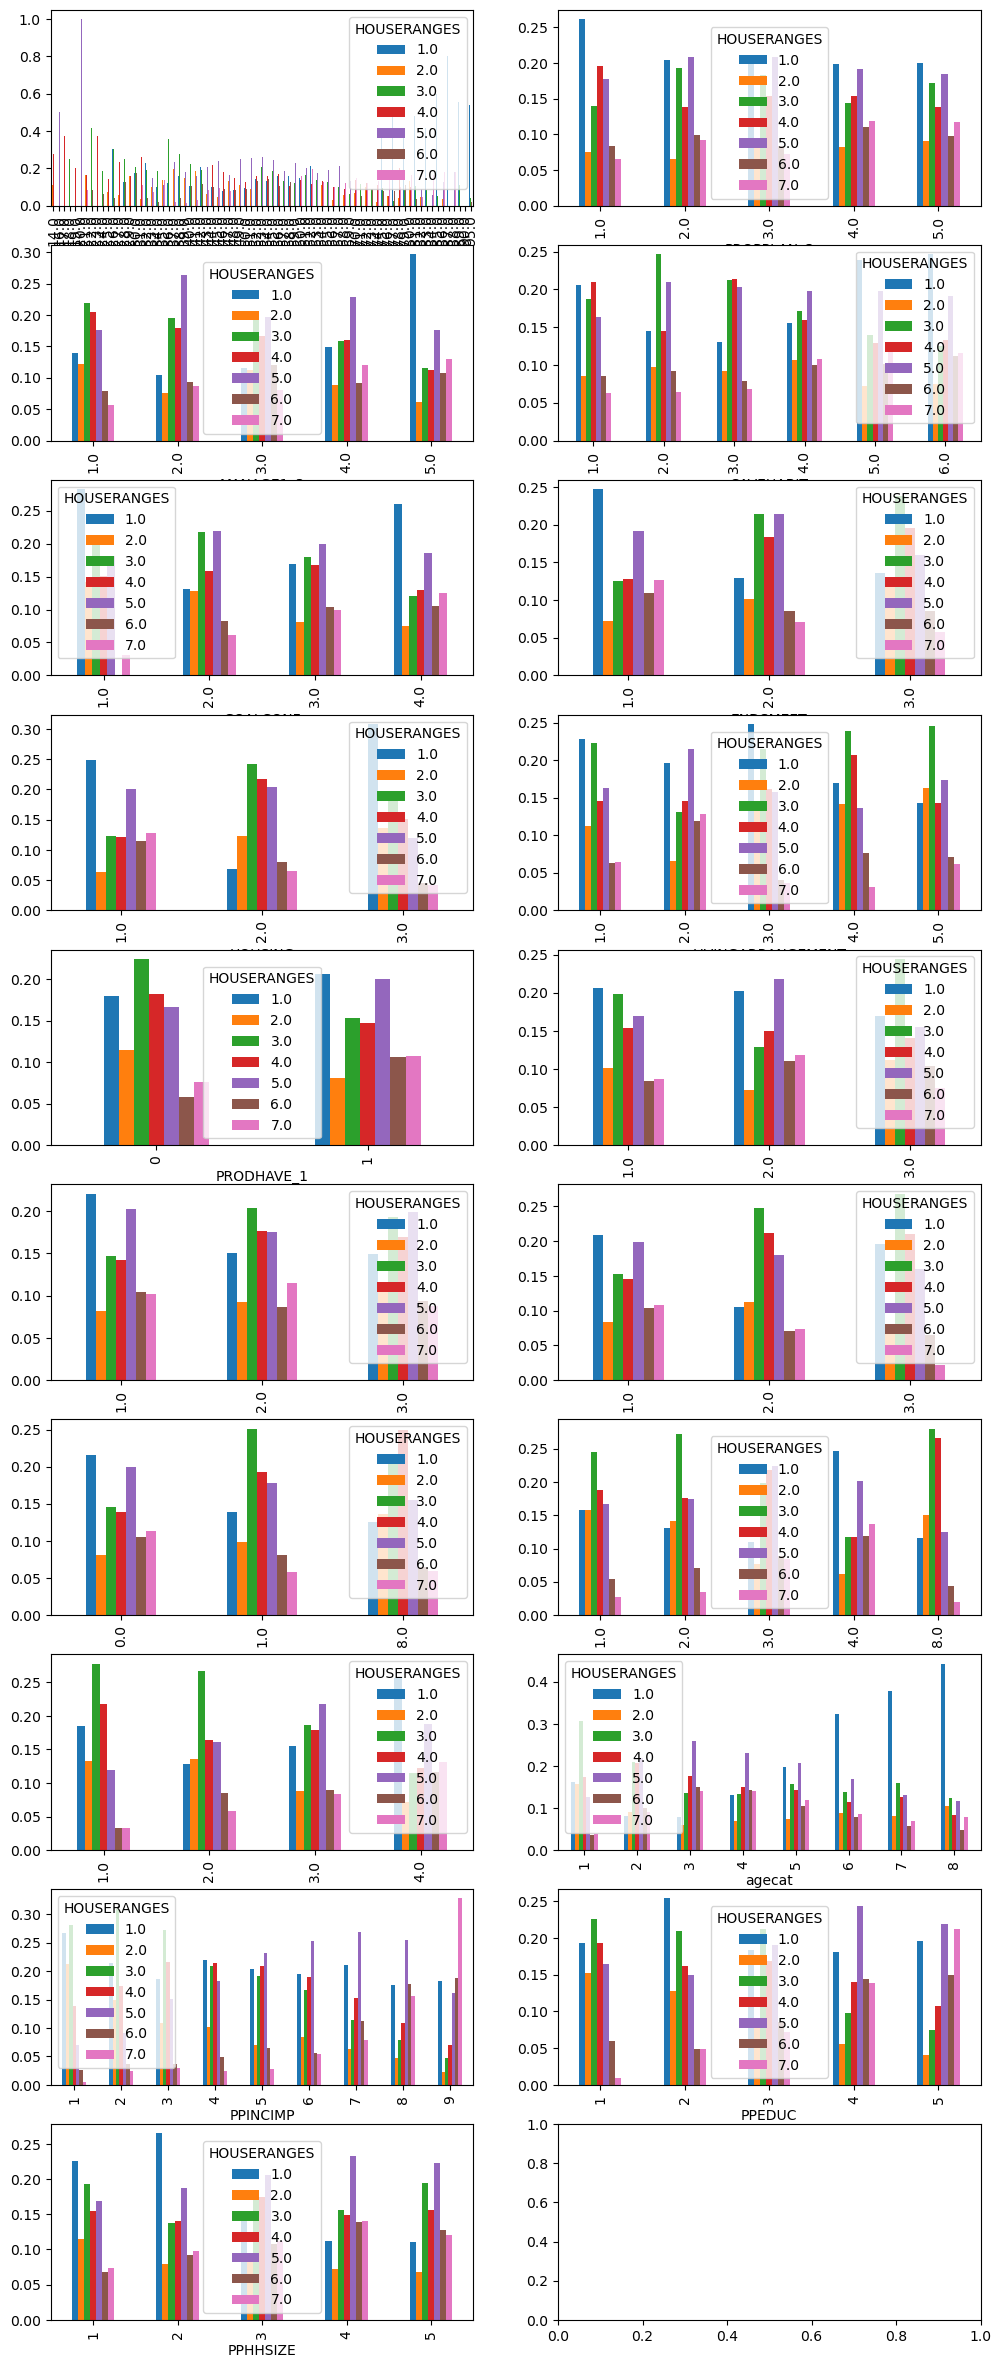

In [174]:
fig, axs = plt.subplots(10, 2, figsize=(12, 30))

feats = ['FWBscore', 'PROPPLAN_3', 'MANAGE1_3', 'SAVEHABIT', 'GOALCONF', 'ENDSMEET', 'HOUSING', 'LIVINGARRANGEMENT', 'PRODHAVE_1', 'EARNERS', 'VOLATILITY', 'MATHARDSHIP_3', 'COLLECT', 'ABSORBSHOCK', 'HOUSESAT', 'agecat', 'PPINCIMP', 'PPEDUC', 'PPHHSIZE']
for i in range(1,20):
    data.groupby(feats[i - 1])['HOUSERANGES'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 2, (i-1) % 2])

Best variables: HOUSING, COLLECT, HOUSESAT, agecat, PPINCIMP, PPEDUC, PPHHSIZE

__VALUERANGES__

'If you were to sell your home today, what do you think it would be worth?'

Possibly related variables: HOUSERANGES, MATHARDSHIP_3, COLLECT, REJECTED_1, REJECTED_2, MANAGE2, HOUSESAT, HOUSING, PPHHSIZE, PPINCIMP

In [178]:
data[data['VALUERANGES'].isna()].shape[0]

185

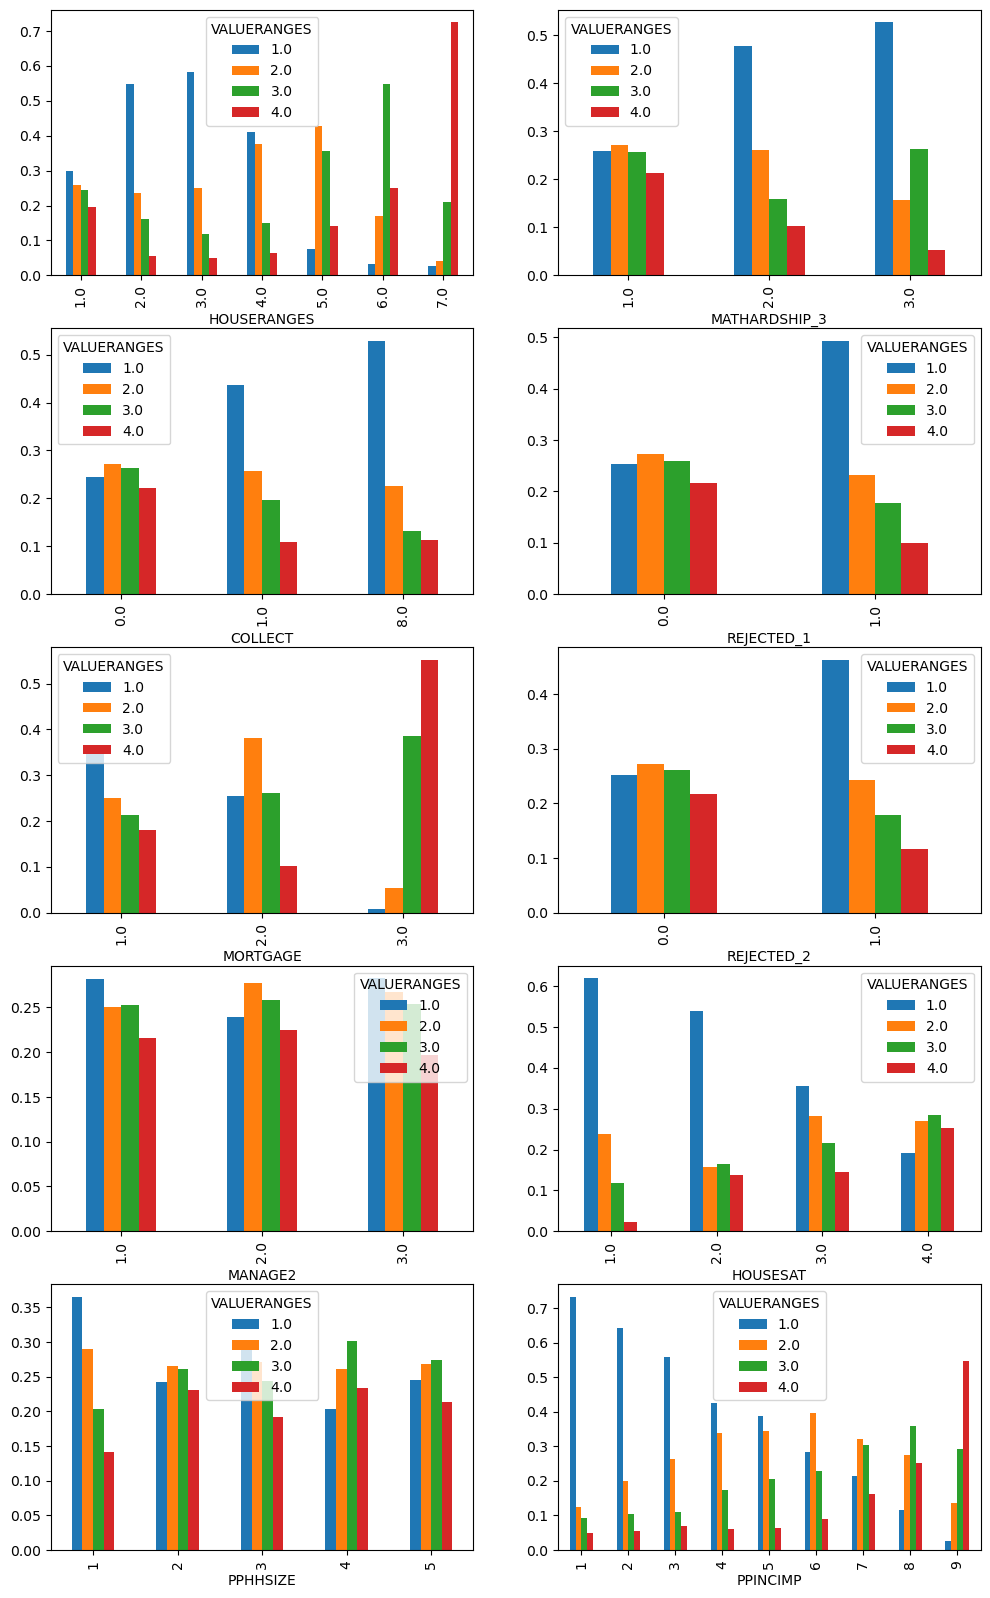

In [179]:
valid_data = data[data['VALUERANGES'] != -2]

fig, axs = plt.subplots(5, 2, figsize=(12, 20))

feats = ['HOUSERANGES', 'MATHARDSHIP_3', 'COLLECT', 'REJECTED_1', 'MORTGAGE', 'REJECTED_2', 'MANAGE2', 'HOUSESAT', 'PPHHSIZE', 'PPINCIMP']
for i in range(1, 11):
    valid_data.groupby(feats[i - 1])['VALUERANGES'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 2, (i-1) % 2])

Best variables: HOUSERANGES, HOUSESAT, PPINCIMP, MORTGAGE

<Axes: xlabel='VALUERANGES', ylabel='count'>

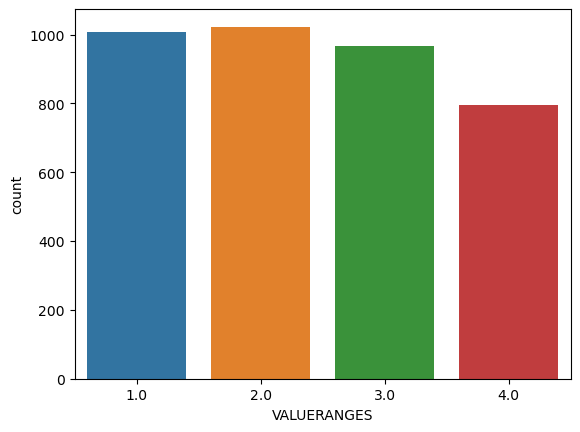

In [180]:
sns.countplot(x = 'VALUERANGES', data = valid_data)

__MORTGAGE__

Similarly to VALUERANGES, the variables that are possibly correlated with the target variable are: HOUSERANGES, MATHARDSHIP_3, COLLECT, REJECTED_1, REJECTED_2, MANAGE2, HOUSESAT, PPHHSIZE and PPINCIMP

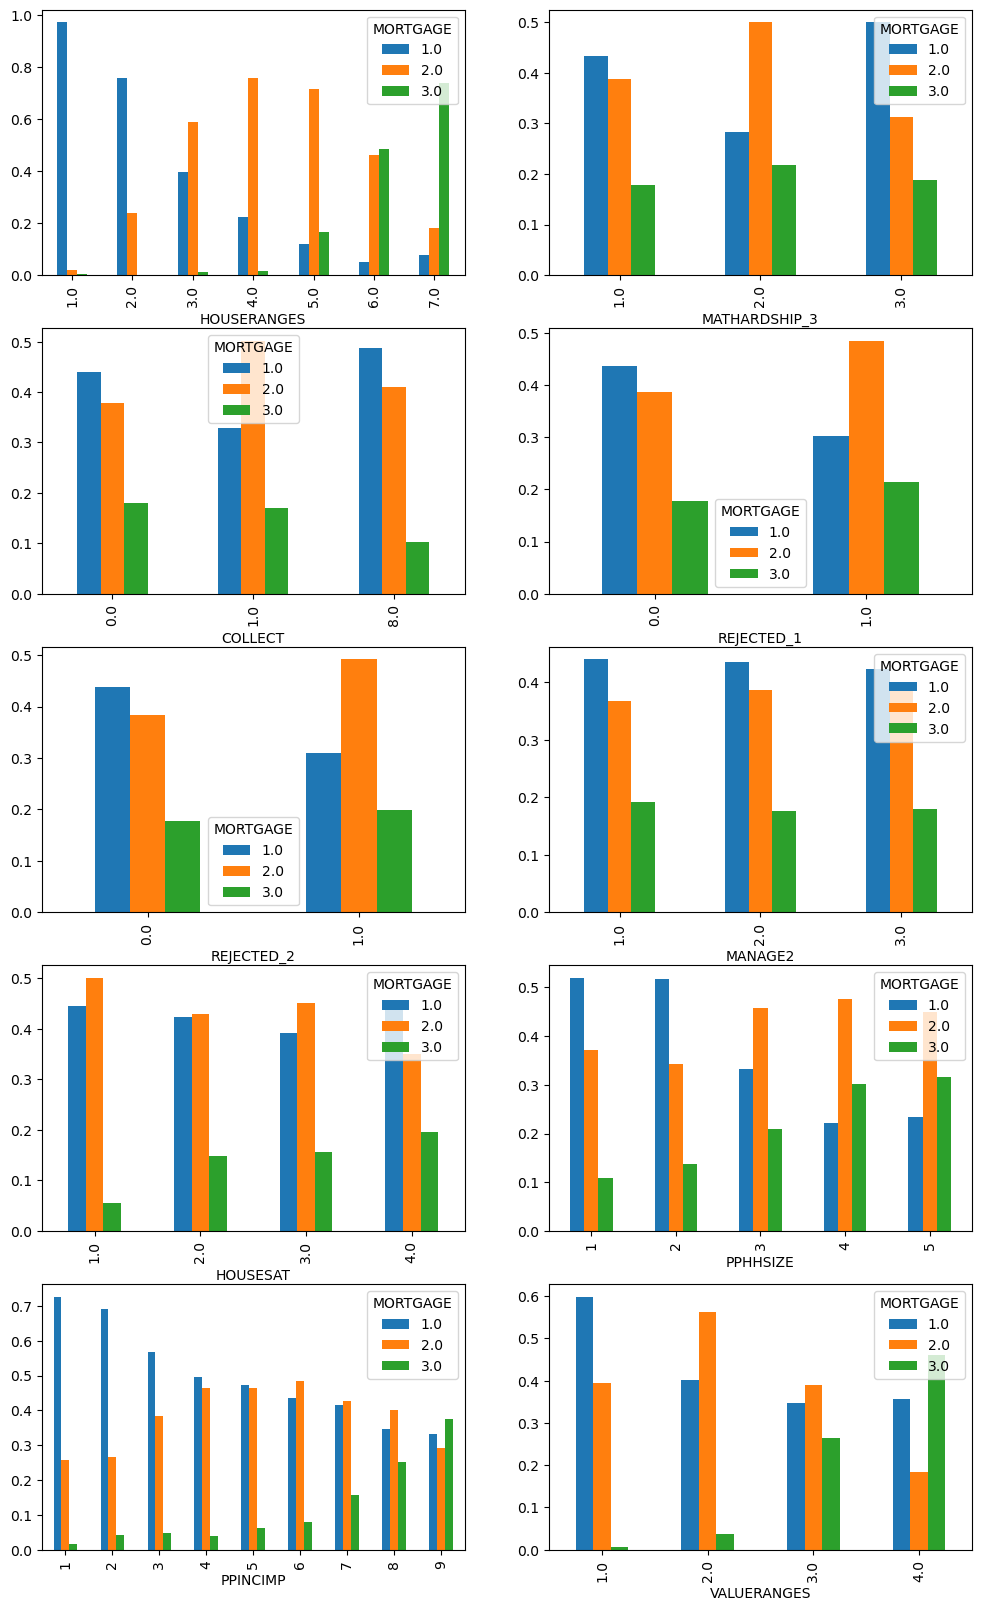

In [181]:
valid_data = data[data['MORTGAGE'] != -2]

fig, axs = plt.subplots(5, 2, figsize=(12, 20))

feats = ['HOUSERANGES', 'MATHARDSHIP_3', 'COLLECT', 'REJECTED_1', 'REJECTED_2', 'MANAGE2', 'HOUSESAT', 'PPHHSIZE', 'PPINCIMP', 'VALUERANGES']
for i in range(1, 11):
    valid_data.groupby(feats[i - 1])['MORTGAGE'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 2, (i-1) % 2])

Best variables: HOUSERANGES, PPHHSIZE, PPINCIMP

<AxesSubplot:xlabel='MORTGAGE', ylabel='count'>

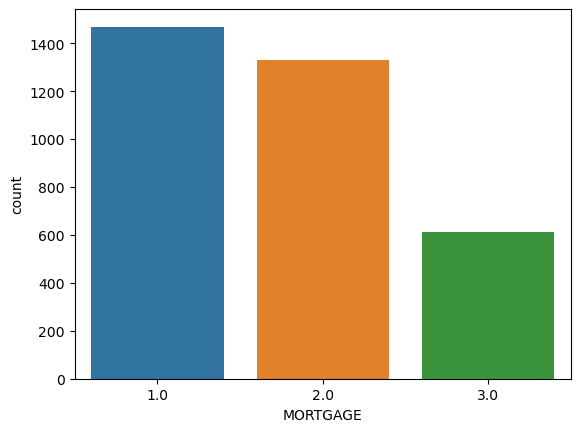

In [42]:
sns.countplot(x = 'MORTGAGE', data = valid_data)

__SAVINGSRANGES__

'How much do you have in savings today?'

Possibly related variables: SAVEHABIT, AUTOMATED_1, AUTOMATED_2, PRODHAVE_1, PRODHAVE_7, BENEFITS_2, FINSOC2_2, FINSOC2_7, MATHARDSHIP_1, COLLECT, PPINCIMP

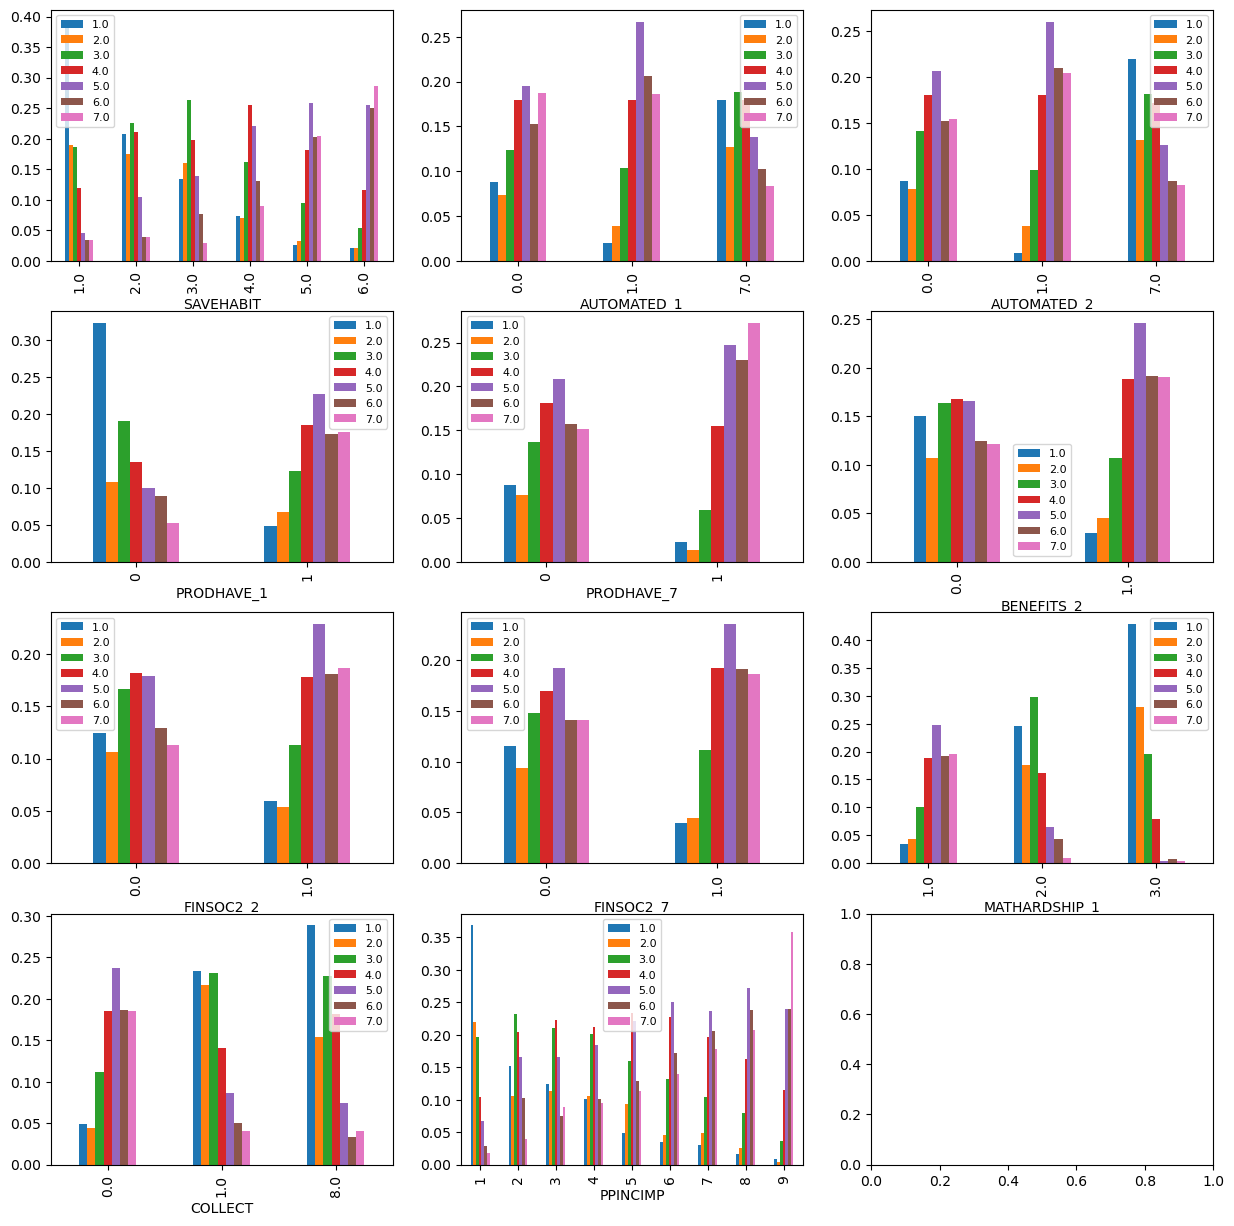

In [183]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

feats = ['SAVEHABIT', 'AUTOMATED_1', 'AUTOMATED_2', 'PRODHAVE_1', 'PRODHAVE_7', 'BENEFITS_2', 'FINSOC2_2', 'FINSOC2_7', 'MATHARDSHIP_1', 'COLLECT', 'PPINCIMP']

for i in range(1, 12):
    data.groupby(feats[i - 1])['SAVINGSRANGES'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 3, (i-1) % 3])
    axs[(i - 1 )// 3, (i-1) % 3].legend(fontsize = 8)

Best variables: SAVEHABIT, PRODHAVE_1, MATHARDSHIP_1, COLLECT, PPINCIMP

__BORROW_1 and BORROW_2__

<Axes: xlabel='BORROW_1', ylabel='count'>

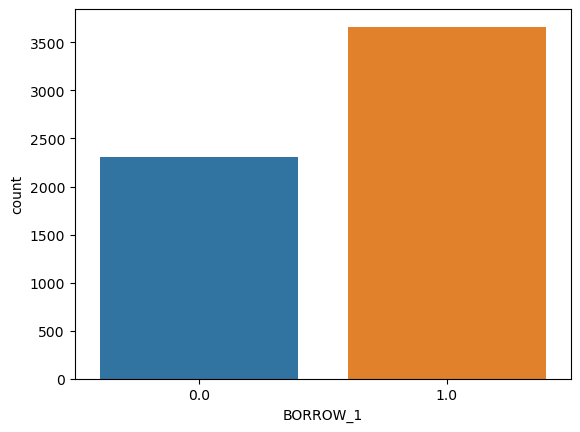

In [184]:
sns.countplot(x = 'BORROW_1', data = data)

<Axes: xlabel='BORROW_2', ylabel='count'>

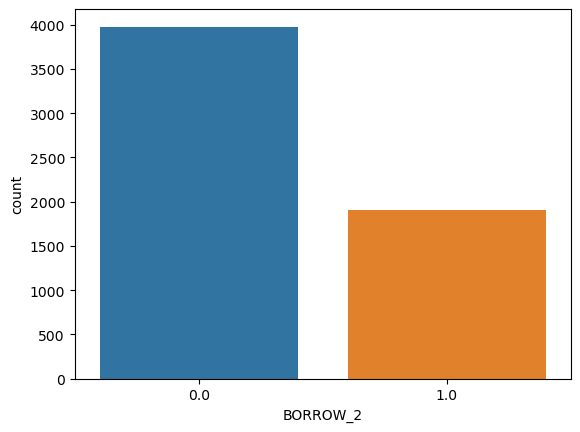

In [185]:
sns.countplot(x = 'BORROW_2', data = data)

As it is difficult to find variables that are related to this one, the best way to impute the missing values is by using the mode

__HSLOC__

<Axes: xlabel='HSLOC', ylabel='count'>

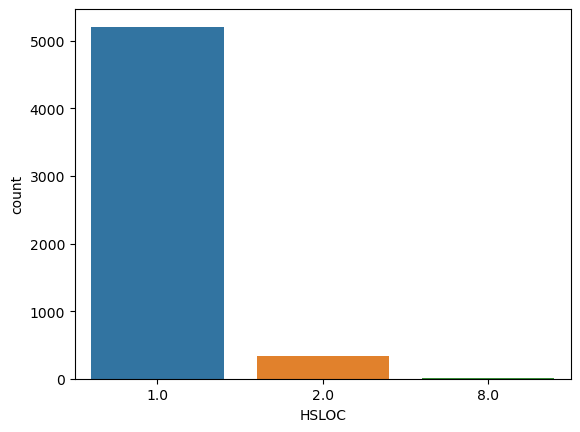

In [186]:
sns.countplot(x = 'HSLOC', data = data)

This variable is really skewed, so its also better t «o just impute the missing values using the mode

__CONNECT__

0 means “I will be completely different in the future”
<br> 100 means “I will be exactly the same in the future.”

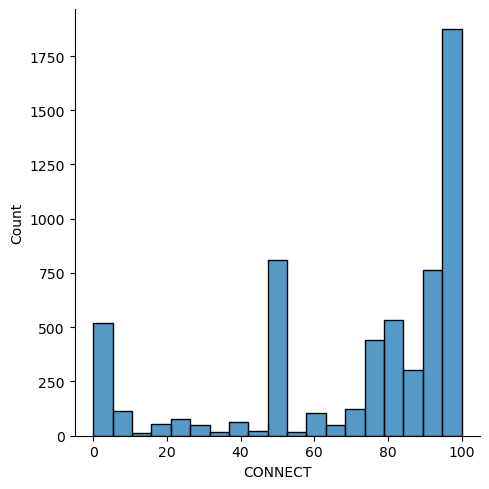

In [187]:
sns.displot(x = 'CONNECT', data = data)

In [188]:
data[data['CONNECT'] > 95].shape[0]

1557

Possibly related variables: CHANGEABLE, agecat, DISTRESS, PPINCIMP

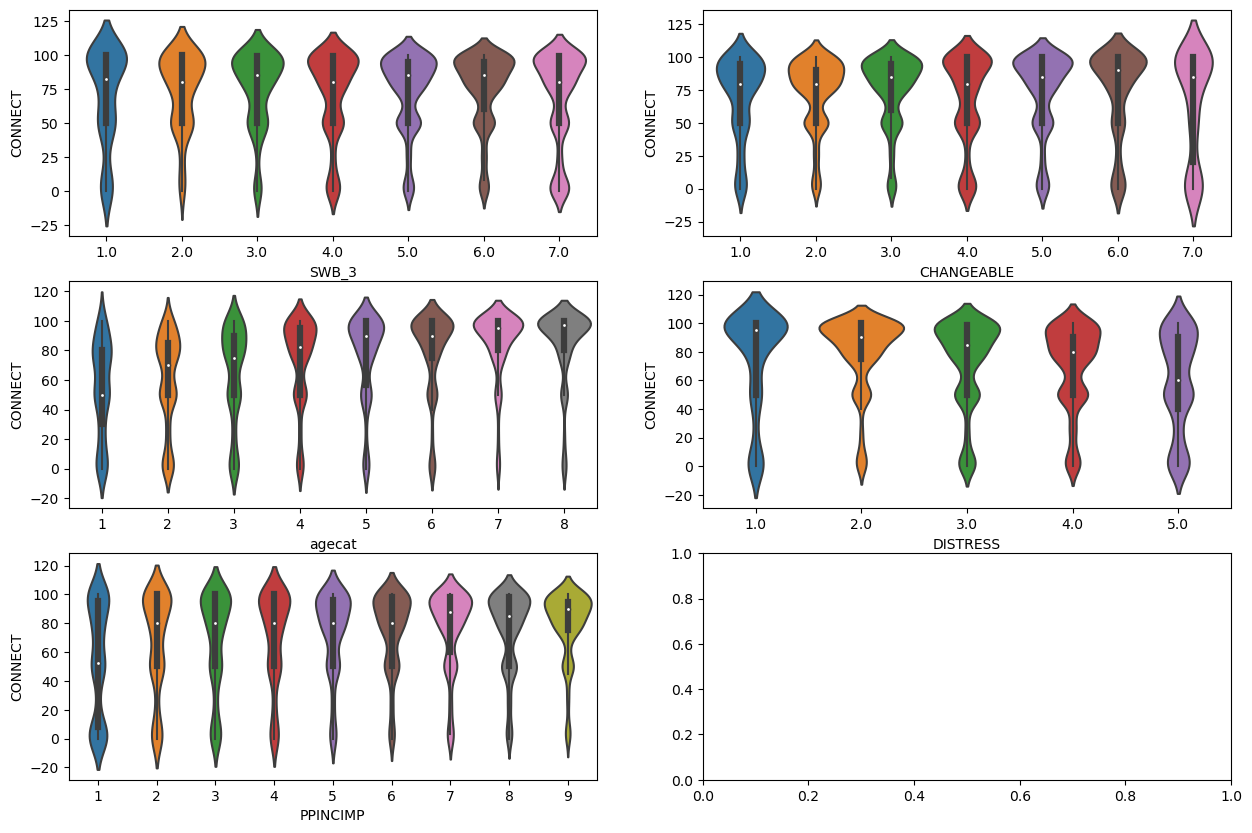

In [189]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))

feats = ['SWB_3', 'CHANGEABLE', 'agecat', 'DISTRESS', 'PPINCIMP']

for i in range(1, 6):
    sns.violinplot(y = 'CONNECT', x = feats[i - 1], data = data, ax = axs[(i - 1 )// 2, (i-1) % 2])

Best variables: PPINCIMP, DISTRESS, agecat, CHANGEABLE

### __8: I can't recall__

HSLOC: Where respondent attended high school
- 1: US and territories
- 2: Outside the US
- 8: Can't recall

COLLECT: Contacted by debt collector in past 12 months?

ABSORBSHOCK: Confidence in ability to raise $2,000 in 30 days

What do to?
- impute HSLOC with mode
- impute COLLECT with KNN
- impute ABSORBSHOCK with KNN

Possibly related variables with COLLECT: FWBscore, SAVEHABIT, MANAGE1_1, GOALCONF, SAVINGSRANGES, VOLATILITY, MATHARDSHIP_1, MATHARDSHIP_2, MATHARDSHIP_3, MATHARDSHIP_6, REJECTED_1, COVERCOSTS

Possible related variables with ABSORBSHOCK: FWBscore, SAVEHABIT, MANAGE1_1, GOALCONF, SAVINGSRANGES, VOLATILITY

In [26]:
data['HSLOC'].value_counts()

 1    5386
-1     644
 2     342
 8      21
Name: HSLOC, dtype: int64

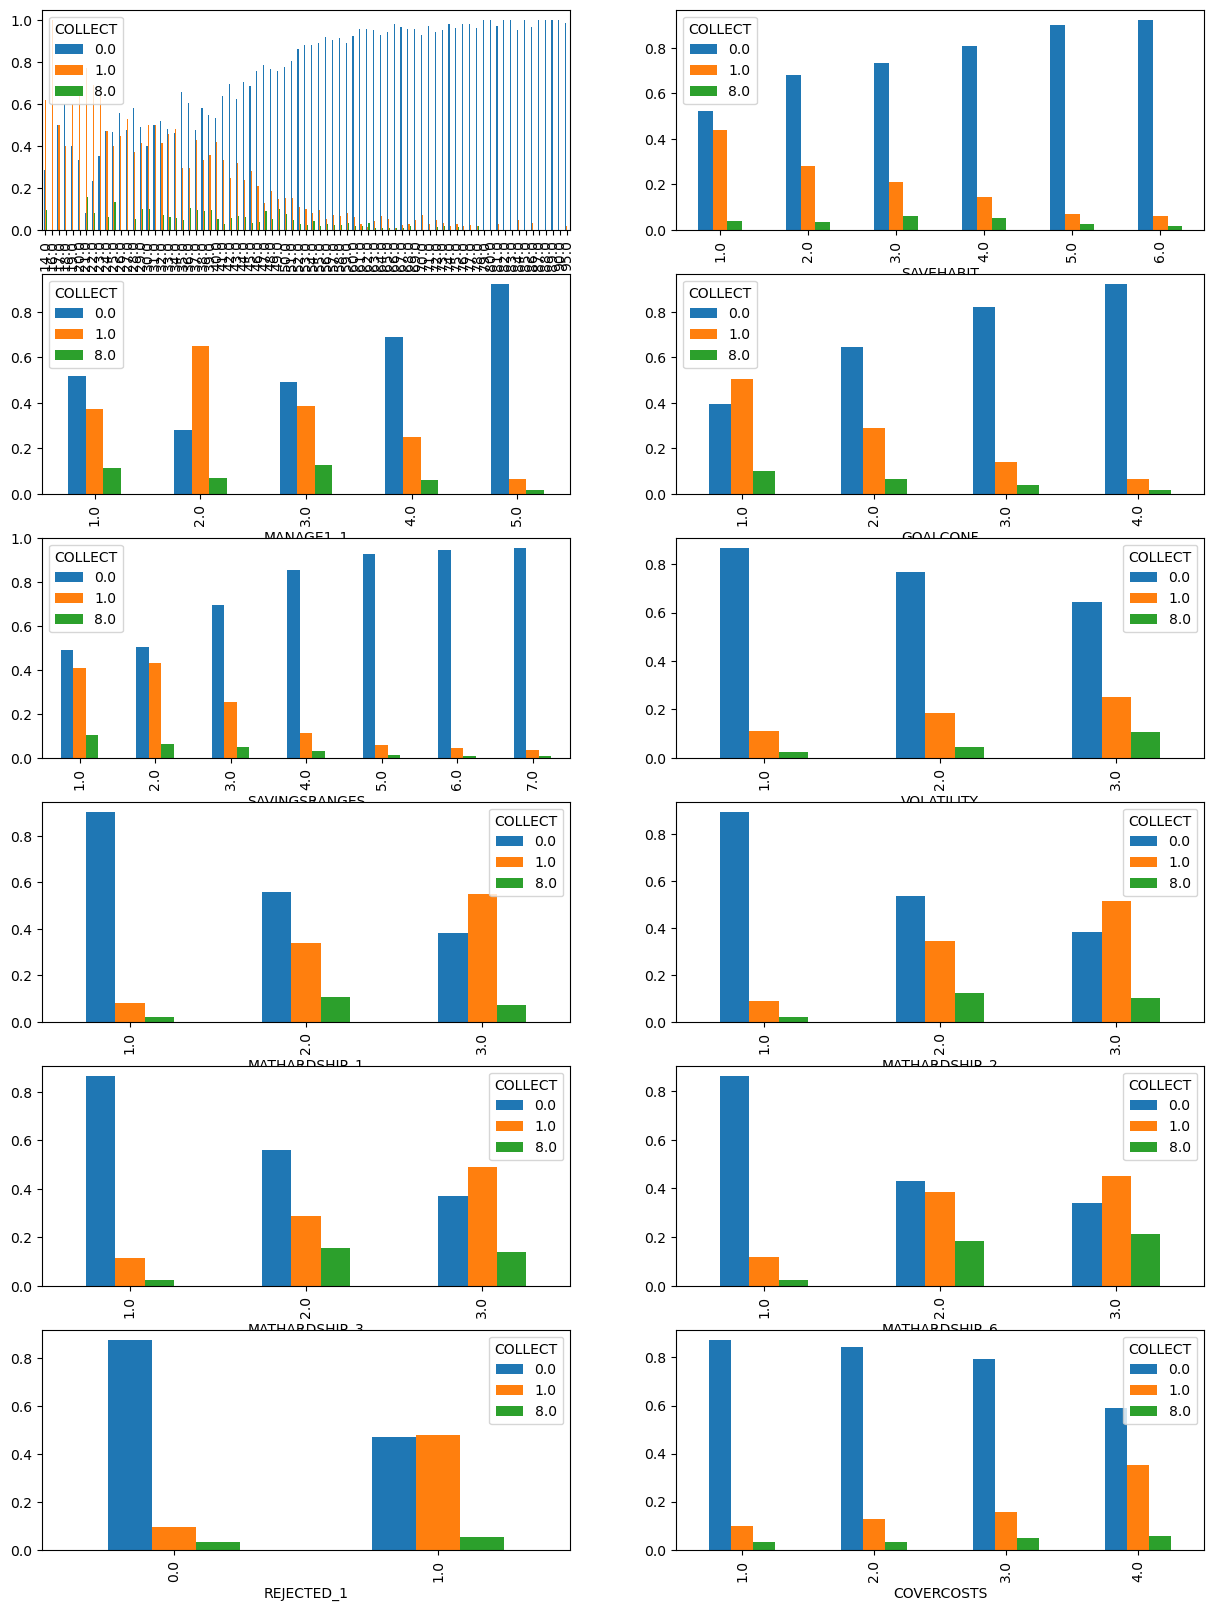

In [190]:
feats = ['FWBscore', 'SAVEHABIT', 'MANAGE1_1', 'GOALCONF', 'SAVINGSRANGES', 'VOLATILITY', 'MATHARDSHIP_1', 'MATHARDSHIP_2', 'MATHARDSHIP_3', 'MATHARDSHIP_6', 'REJECTED_1', 'COVERCOSTS']

fig, axs = plt.subplots(6, 2, figsize=(15, 20))
for i in range(1, 13):
    data.groupby(feats[i-1])['COLLECT'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 2, (i-1) % 2])

Best variables: FWBscore, SAVEHABIT, GOALCONF, SAVINGSRANGES, MATHARDSHIP_1 (for example)

<Axes: xlabel='ABSORBSHOCK', ylabel='count'>

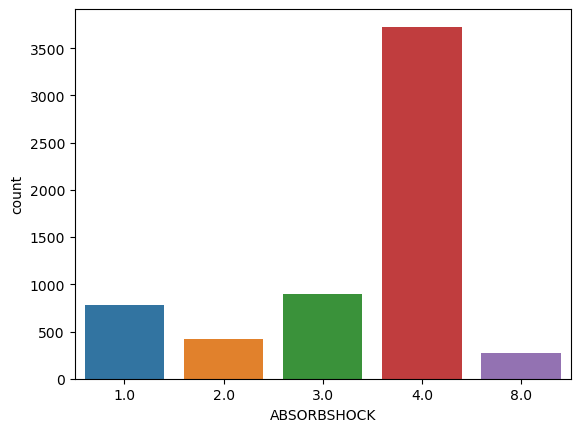

In [192]:
sns.countplot(x = 'ABSORBSHOCK', data = data)

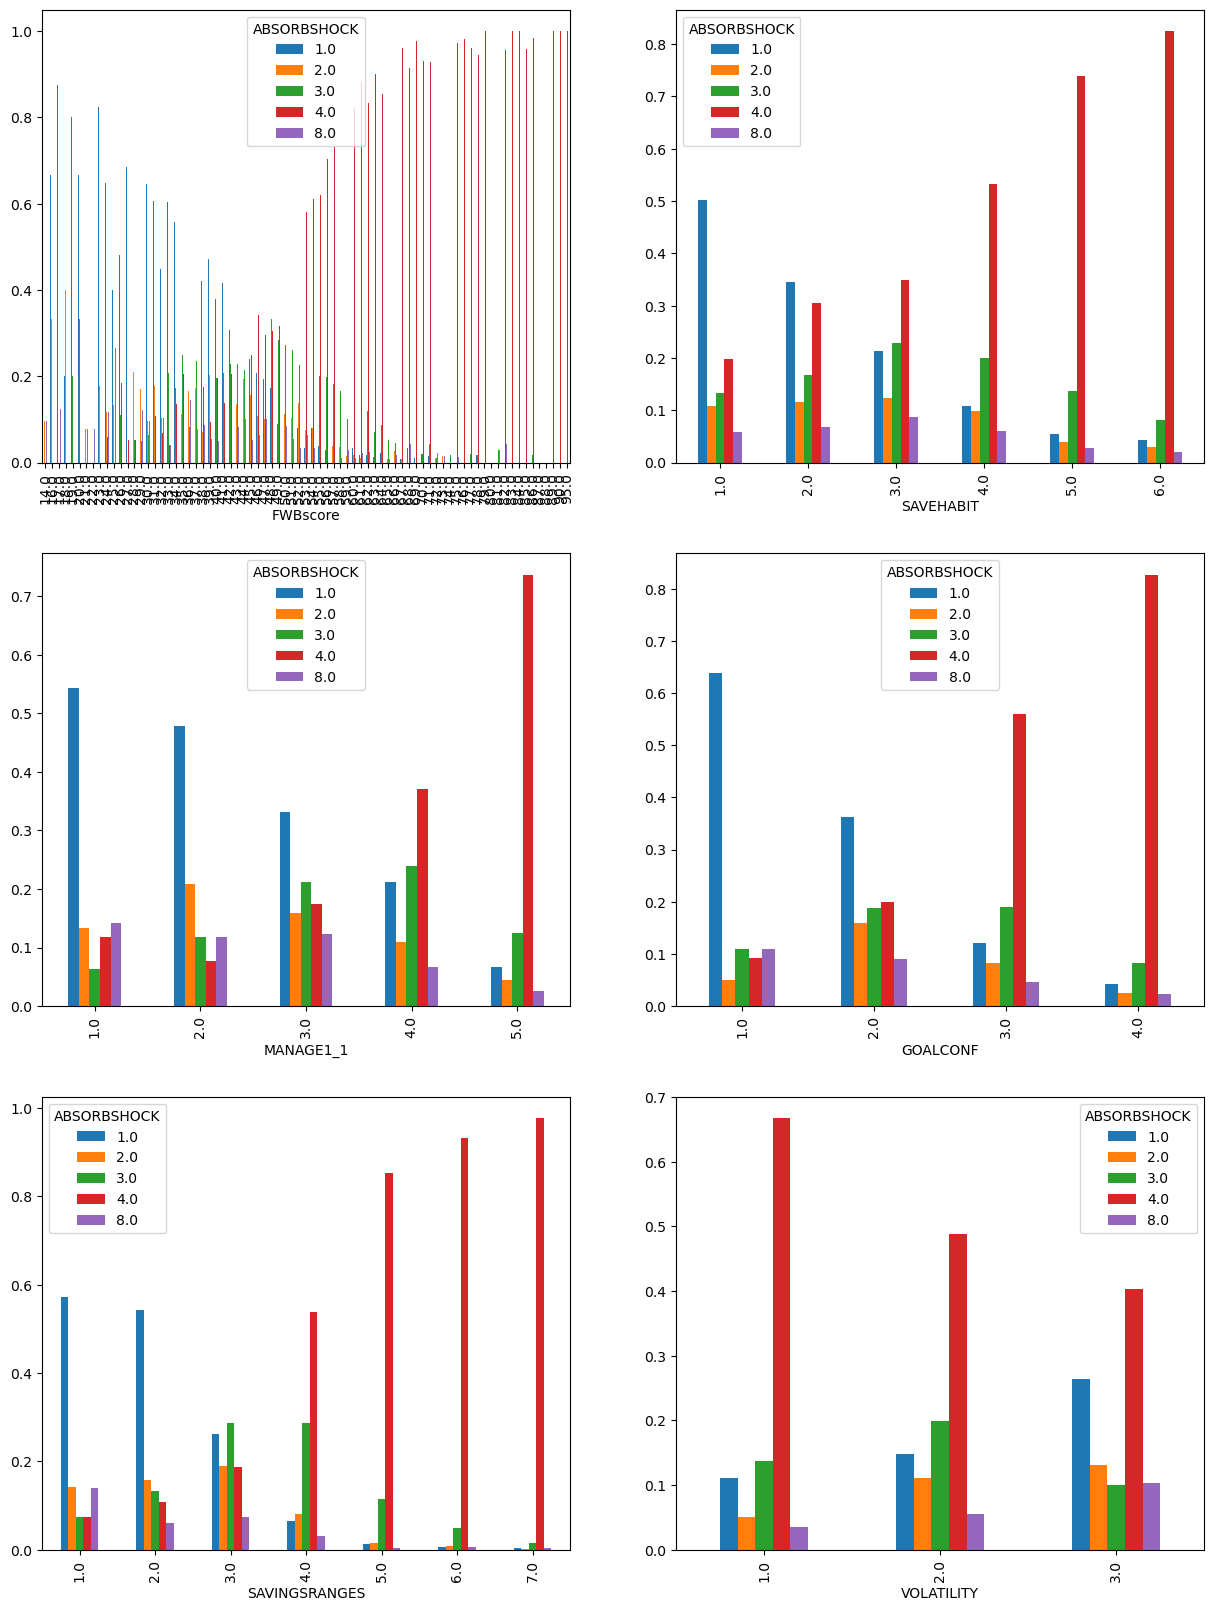

In [193]:
feats = ['FWBscore', 'SAVEHABIT', 'MANAGE1_1', 'GOALCONF', 'SAVINGSRANGES', 'VOLATILITY']

fig, axs = plt.subplots(3, 2, figsize=(15, 20))
for i in range(1, 7):
    data.groupby(feats[i-1])['ABSORBSHOCK'].value_counts(normalize = True).unstack().plot.bar(ax = axs[(i - 1 )// 2, (i-1) % 2])

Best variables: FWBscore, MANAGE1_1, GOALCONF, SAVINGSRANGES

## Target and Weights variables exploration

Data types:

In [194]:
data.dtypes.value_counts()

float64    96
int64      67
dtype: int64

### Weights

__Variable finalwt__: the weights included in the dataset are important for ensuring that the results obtained from the survey are representative of the United States population. These weights are used to account for variations in the probability of selection and to adjust for differential nonresponse across different socioeconomic groups.

In machine learning, when using weighted data, you can include the weights in the model training process to adjust for sampling bias. The exact method for including weights depends on the specific machine learning algorithm you are using.

For example, if you are using scikit-learn library in Python, you can use the 'sample_weight' parameter in the 'fit' method to specify the weights for each training example. Other machine learning libraries may have different methods for incorporating weights.

/tmp/ipykernel_775/4273878293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['finalwt'])


<Axes: xlabel='finalwt', ylabel='Density'>

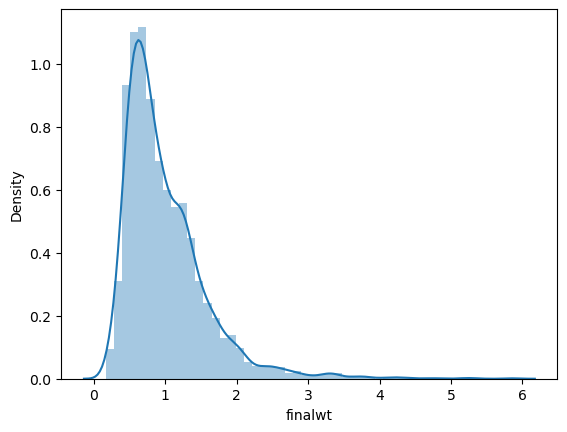

In [195]:
sns.distplot(data['finalwt'])


### Target

__Target variable__: fpl (Federal poverty level)

- <100% Federal Poverty Level
- 100-199% Federal Poverty Level
- 200%+ Federal Poverty Level

In [196]:
data.fpl.value_counts(normalize = True)

3    0.768713
2    0.131812
1    0.099475
Name: fpl, dtype: float64

The dataset is quite imbalanced